In [9]:
import os
import math
import random

import matplotlib.pyplot as plt

from collections import *
import pickle
import time

%matplotlib inline

### Data preparation

In [10]:
stopwords = set(['a', 'about', 'above', 'across', 'after', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'among', 'an', 'and', 'another', 'any', 'anybody', 'anyone', 'anything', 'anywhere', 'are', 'area', 'areas', 'around', 'as', 'ask', 'asked', 'asking', 'asks', 'at', 'away', 'b', 'back', 'backed', 'backing', 'backs', 'be', 'became', 'because', 'become', 'becomes', 'been', 'before', 'began', 'behind', 'being', 'beings', 'best', 'better', 'between', 'big', 'both', 'but', 'by', 'c', 'came', 'can', 'cannot', 'case', 'cases', 'certain', 'certainly', 'clear', 'clearly', 'come', 'could', 'd', 'did', 'differ', 'different', 'differently', 'do', 'does', 'done', 'down', 'down', 'downed', 'downing', 'downs', 'during', 'e', 'each', 'early', 'either', 'end', 'ended', 'ending', 'ends', 'enough', 'even', 'evenly', 'ever', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'f', 'face', 'faces', 'fact', 'facts', 'far', 'felt', 'few', 'find', 'finds', 'first', 'for', 'four', 'from', 'full', 'fully', 'further', 'furthered', 'furthering', 'furthers', 'g', 'gave', 'general', 'generally', 'get', 'gets', 'give', 'given', 'gives', 'go', 'going', 'good', 'goods', 'got', 'great', 'greater', 'greatest', 'group', 'grouped', 'grouping', 'groups', 'h', 'had', 'has', 'have', 'having', 'he', 'her', 'here', 'herself', 'high', 'high', 'high', 'higher', 'highest', 'him', 'himself', 'his', 'how', 'however', 'i', 'if', 'important', 'in', 'interest', 'interested', 'interesting', 'interests', 'into', 'is', 'it', 'its', 'itself', 'j', 'just', 'k', 'keep', 'keeps', 'kind', 'knew', 'know', 'known', 'knows', 'l', 'large', 'largely', 'last', 'later', 'latest', 'least', 'less', 'let', 'lets', 'like', 'likely', 'long', 'longer', 'longest', 'm', 'made', 'make', 'making', 'man', 'many', 'may', 'me', 'member', 'members', 'men', 'might', 'more', 'most', 'mostly', 'mr', 'mrs', 'much', 'must', 'my', 'myself', 'n', 'necessary', 'need', 'needed', 'needing', 'needs', 'never', 'new', 'new', 'newer', 'newest', 'next', 'no', 'nobody', 'non', 'noone', 'not', 'nothing', 'now', 'nowhere', 'number', 'numbers', 'o', 'of', 'off', 'often', 'old', 'older', 'oldest', 'on', 'once', 'one', 'only', 'open', 'opened', 'opening', 'opens', 'or', 'order', 'ordered', 'ordering', 'orders', 'other', 'others', 'our', 'out', 'over', 'p', 'part', 'parted', 'parting', 'parts', 'per', 'perhaps', 'place', 'places', 'point', 'pointed', 'pointing', 'points', 'possible', 'present', 'presented', 'presenting', 'presents', 'problem', 'problems', 'put', 'puts', 'q', 'quite', 'r', 'rather', 'really', 'right', 'right', 'room', 'rooms', 's', 'said', 'same', 'saw', 'say', 'says', 'second', 'seconds', 'see', 'seem', 'seemed', 'seeming', 'seems', 'sees', 'several', 'shall', 'she', 'should', 'show', 'showed', 'showing', 'shows', 'side', 'sides', 'since', 'small', 'smaller', 'smallest', 'so', 'some', 'somebody', 'someone', 'something', 'somewhere', 'state', 'states', 'still', 'still', 'such', 'sure', 't', 'take', 'taken', 'than', 'that', 'the', 'their', 'them', 'then', 'there', 'therefore', 'these', 'they', 'thing', 'things', 'think', 'thinks', 'this', 'those', 'though', 'thought', 'thoughts', 'three', 'through', 'thus', 'to', 'today', 'together', 'too', 'took', 'toward', 'turn', 'turned', 'turning', 'turns', 'two', 'u', 'under', 'until', 'up', 'upon', 'us', 'use', 'used', 'uses', 'v', 'very', 'w', 'want', 'wanted', 'wanting', 'wants', 'was', 'way', 'ways', 'we', 'well', 'wells', 'went', 'were', 'what', 'when', 'where', 'whether', 'which', 'while', 'who', 'whole', 'whose', 'why', 'will', 'with', 'within', 'without', 'work', 'worked', 'working', 'works', 'would', 'x', 'y', 'year', 'years', 'yet', 'you', 'young', 'younger', 'youngest', 'your', 'yours', 'z', ''])

In [11]:
def only_letters(word):
    return ''.join(filter(str.isalpha, word))

def prepare(text):
    words = text.split()
    words = map(str.lower, words)
    words = map(only_letters, words)
    words = list(filter(lambda x: x not in stopwords, words))
    return words

In [12]:
# load dataset
def load_dataset():
    dataset = []
    
    for label in os.listdir('dataset'):
        path = f'dataset/{label}'
        
        for filename in os.listdir(path):
            with open(f'{path}/{filename}') as file:
                text = file.read()
                
                words = prepare(text)
                
                dataset.append((words, label))
    
    return dataset
                

In [13]:
dataset = load_dataset()

In [14]:
categories = os.listdir('dataset')
categories

categories_idx = {
    'business':0, 'entertainment':1, 'politics':2, 'sport':3, 'tech':4
}

In [15]:
def split_test_train(dataset, ratio=0.8):
    counter = defaultdict(int)
    
    for words, label in dataset:
        counter[label] += 1
    
    random.shuffle(dataset)
    
    x_train, y_train = [], []
    x_test, y_test = [], []
    
    placed = defaultdict(int)
    
    for words, label in dataset:
        if placed[label] < counter[label] * ratio:
            x_train.append(words)
            y_train.append(label)
            placed[label] += 1
        
        else:
            x_test.append(words)
            y_test.append(label)
    
    return x_train, y_train, x_test, y_test

In [16]:
x_train, y_train, x_test, y_test = split_test_train(dataset)

In [17]:
len(x_train), len(x_test)

(1781, 444)

In [18]:
all_words = set()


for sample in x_train:
    all_words.update(sample)
    
sorted_words = sorted(all_words)

In [19]:
word_index = {}

for idx, word in enumerate(sorted_words):
    word_index[word] = idx

In [20]:
len(word_index)

28238

In [21]:
total_document = len(x_train)

word_document_freq = defaultdict(int)

for doc in x_train:
    for word in set(doc):
        word_document_freq[word] += 1    

In [22]:
def vectorize(sample):
    # to sparse matrix
    vec = defaultdict(int)
    
    for word in sample:
        if word in word_index:
            idx = word_index[word]
            vec[idx] += 1
    
    for key in vec.keys():
        word = sorted_words[key]
        tf = vec[key] / len(sample)        
        idf = math.log(total_document / word_document_freq[word])
        
        vec[key] = tf * idf
    
    vec[len(word_index)] = 1
    
    return vec

In [23]:
x_train_vectorized = list(map(vectorize, x_train))
y_train_encoded = list(map(lambda x: categories_idx[x], y_train))

### Logistic Regression

In [24]:
def sigmoid_scalar(x):
    # to avoid overflow
    if x < 0:
        sigmoid = math.exp(x) / (1 + math.exp(x))
    else:
        sigmoid = 1 / (1 + math.exp(-x))

    # to handle machine precision errors
    sigmoid = max(0.0001, sigmoid)
    sigmoid = min(0.9999, sigmoid)

    return sigmoid

In [25]:
def argmax(values):
    max_value = float('-inf')
    max_index = 0

    for idx, value in enumerate(values):
        if value > max_value:
            max_index = idx
            max_value = value

    return max_index


In [26]:
def predict(sample_x, weights):
    # calculate z = sum(w * x + b)
    # here bias (b) is also included in weights
    z = 0
    
    for idx, tfidf in sample_x.items():
        z += weights[idx] * tfidf

    # sigmoid(z)
    return sigmoid_scalar(z)

In [27]:
def cross_entropy_loss(predicted_value, actual_value):
    y = actual_value
    y_pred = predicted_value    

    if y == 1:        
        return -math.log(y_pred)

    else:        
        return -math.log(1 - y_pred)

In [28]:
def gradient_decent(X, label, weights=None, learning_rate=0.1):
    #n_features = len(X[0])

    # initialize weight with random values (equal length to x's features)
    # works with sparse matrix
    if weights == None:
        weights = defaultdict(lambda:random.random())

    loss = 0

    for x, y in zip(X, label):
        y_pred = predict(x, weights)
        
        loss += cross_entropy_loss(y_pred, y)

        # dw = (y_pred - y) * x
        # weight = weight - learning_rate * dw
        err = y_pred - y
        for i, value in x.items():
            dw_i = err * value
            weights[i] -= learning_rate * dw_i

    return weights, loss / len(X)

In [29]:
def train_binary_class(x_train, y_train, learning_rate, epoch, verbose=False):
    weights = None

    # for graphing
    history = []

    for i in range(epoch):
        weights, loss = gradient_decent(x_train, y_train, weights, learning_rate)

        history.append(loss)

        if verbose:
            print(f"Epoch [{i}]\n\t- Cross entropy loss: {loss}\n")

    return weights, history

In [30]:
def train_multiclass(x_train, y_train, learning_rate, epoch, verbose=False):
    # identify unique classes
    classes = range(0, len(categories))

    # for each class create separate labels suitable for binary classification
    labels = [[] for _ in classes]

    for class_ in classes:
        for label in y_train:              
            if label == class_:
                labels[class_].append(1)

            else:
                labels[class_].append(0)
    
    # now that we have separate labels for each class
    # lets train binary classifier for each class
    # (each classifier will identify whether sample x is member of class or not)


    classifiers = [None] * len(classes)
    histories = [None] * len(classes)

    for cls_, label in enumerate(labels):
        if verbose:
            print(f'Training class [{categories[cls_]}]')

        weights, history = train_binary_class(x_train, label, learning_rate, epoch)        
        
        classifiers[cls_] = weights
        histories[cls_] = history

        if verbose:
            print('---------------------------------------------------------------------')
    

    return classifiers, histories

In [31]:
def predict_class(sample_x, model):
    class_probabilities = []
    
    for weights in model:
        class_probability = predict(sample_x, weights)        
        class_probabilities.append(class_probability)
        
    
    return argmax(class_probabilities)

In [32]:
# sum([predict_class(x_train_normalized[i], model) == y_train[i] for i in range(60000)])

def confusion_matrix(test_x, label, model):
    grid = [[0] * len(categories) for _ in range(len(categories))]
    net_accuracy = 0        

    for i in range(len(test_x)):
        prediction = predict_class(test_x[i], model)                                 

        grid[prediction][label[i]] += 1
        
#         print(prediction, label[i], categories[prediction])

        if prediction == label[i]:
            net_accuracy += 1              

    return grid, net_accuracy / len(test_x)


### Training

In [37]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0, 1.5]

epochs = 100

models = []
histories = []

for eta in learning_rates:
    print(f'Learning rate: {eta}')

    start_time = time.perf_counter()

    model, history = train_multiclass(x_train_vectorized, y_train_encoded, eta, epochs, verbose=True)
                
    time_taken = time.perf_counter() - start_time  
    
    
    print('Time taken:', time_taken)
    
    models.append(model)
    histories.append(history)

    

Learning rate: 0.0001
Training class [business]
---------------------------------------------------------------------
Training class [entertainment]
---------------------------------------------------------------------
Training class [politics]
---------------------------------------------------------------------
Training class [sport]
---------------------------------------------------------------------
Training class [tech]
---------------------------------------------------------------------
Time taken: 79.96663599999738
Learning rate: 0.001
Training class [business]
---------------------------------------------------------------------
Training class [entertainment]
---------------------------------------------------------------------
Training class [politics]
---------------------------------------------------------------------
Training class [sport]
---------------------------------------------------------------------
Training class [tech]
-----------------------------------------

In [38]:
x_test_vectorized = list(map(vectorize, x_test))
y_test_encoded = list(map(lambda x: categories_idx[x], y_test))

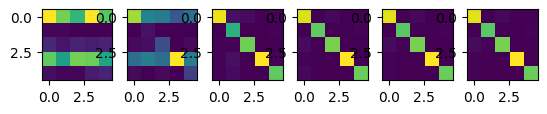

In [41]:
# draw confussion matrix

fig, axs = plt.subplots(nrows=1, ncols=len(learning_rates))

accuracy = []

for i, ax in enumerate(axs.flat):
    
    ax.set_label(learning_rates[i])
    
    cm, acc = confusion_matrix(x_test_vectorized, y_test_encoded, models[i])
    accuracy.append(acc)

    ax.imshow(cm)   



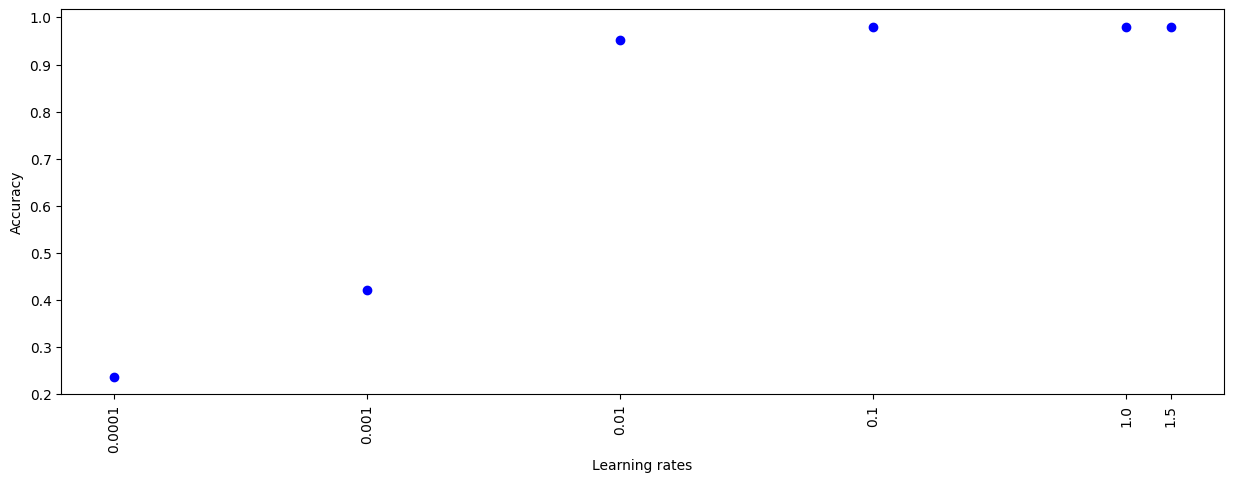

In [42]:
plt.rcParams["figure.figsize"] = (15,5)

plt.plot(list(map(math.log, learning_rates)), accuracy, 'bo')
plt.xlabel('Learning rates')
plt.ylabel('Accuracy')
plt.xticks(list(map(math.log, learning_rates)), labels=learning_rates, rotation=90)

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

In [43]:
accuracy

[0.23648648648648649,
 0.42117117117117114,
 0.9527027027027027,
 0.9797297297297297,
 0.9797297297297297,
 0.9797297297297297]